
📊 Dataset Overview
------------------------------------------------------------
🧾 Total Rows: 5110
🧾 Total Columns: 12

🔍 Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None

❗ Missing Value

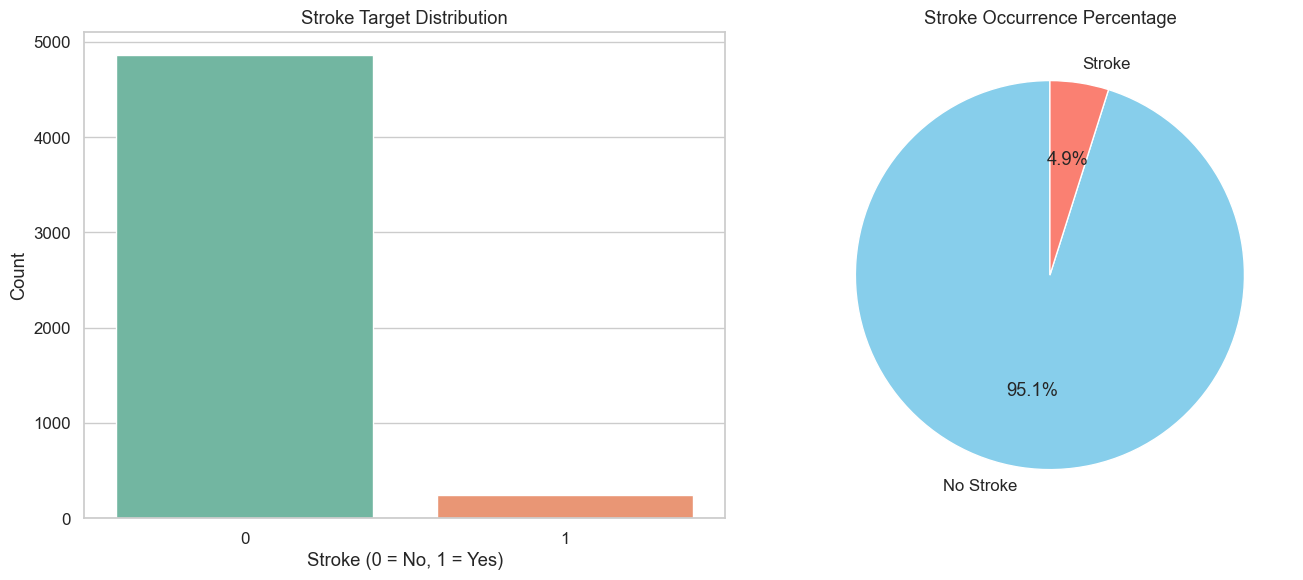

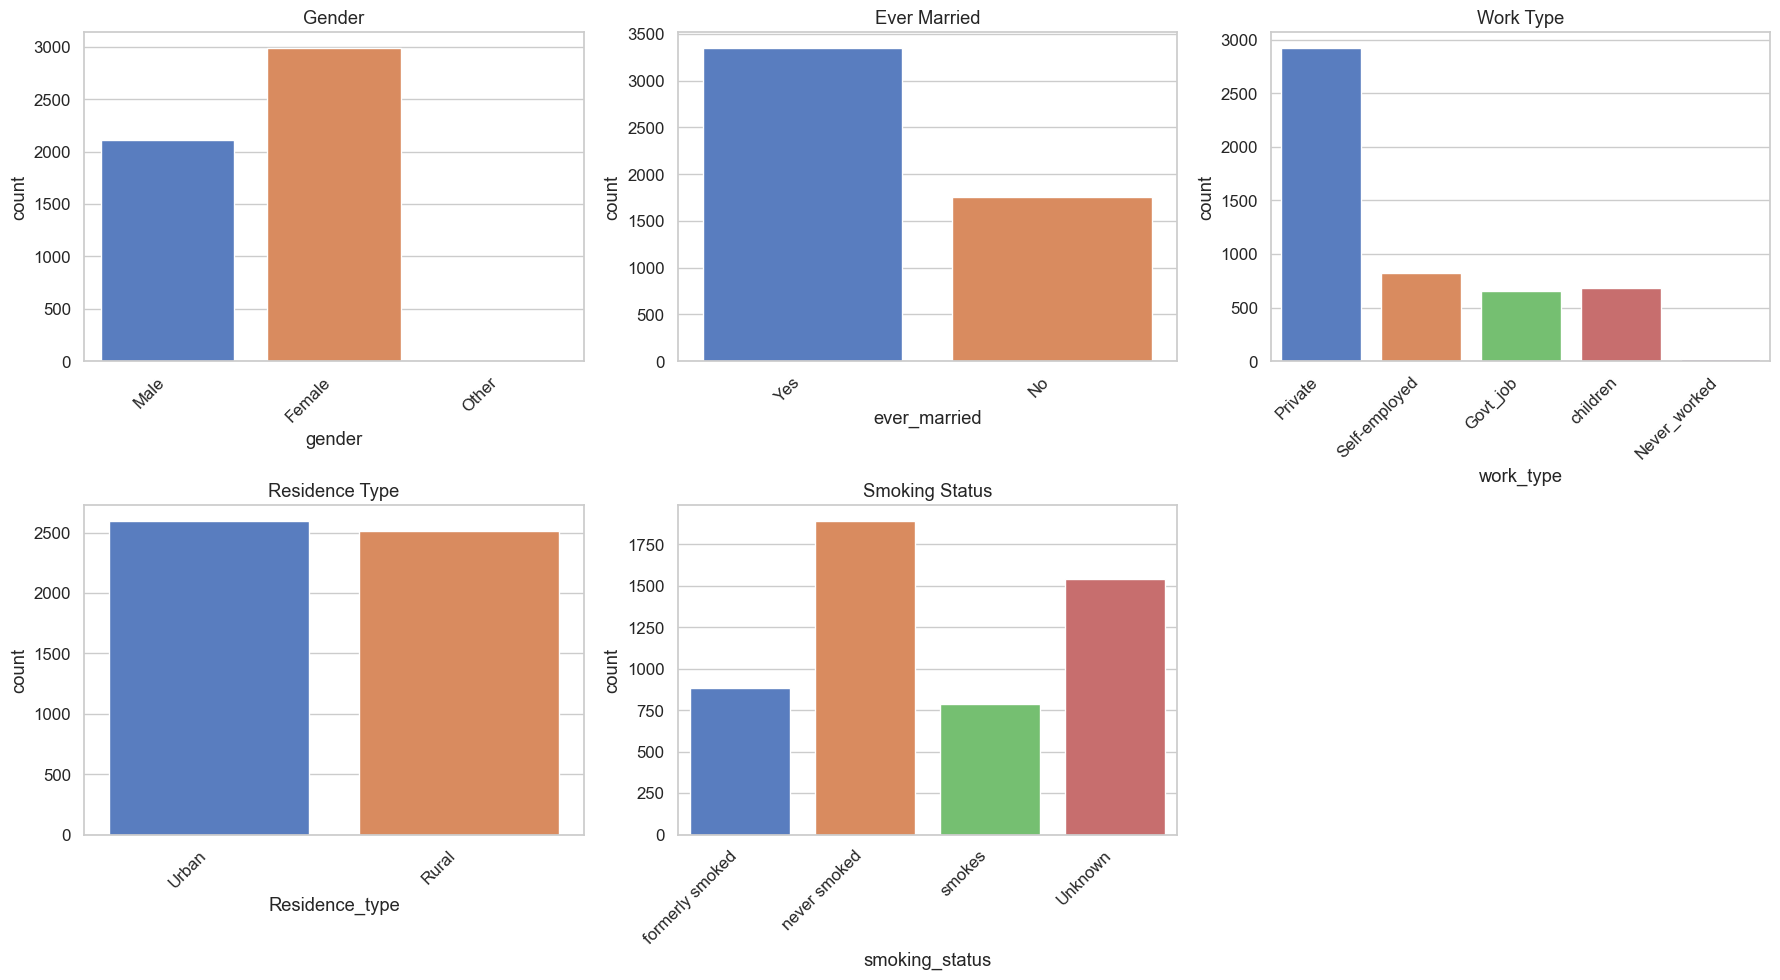

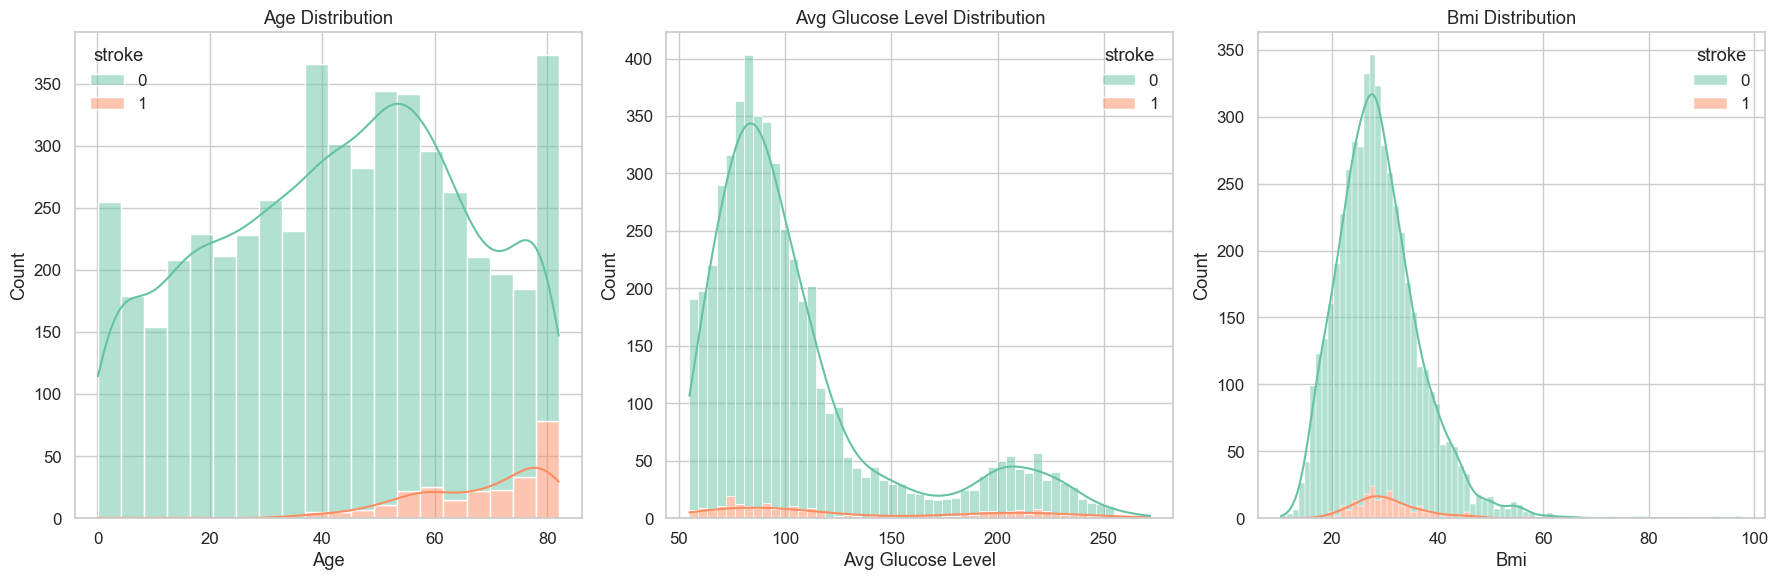

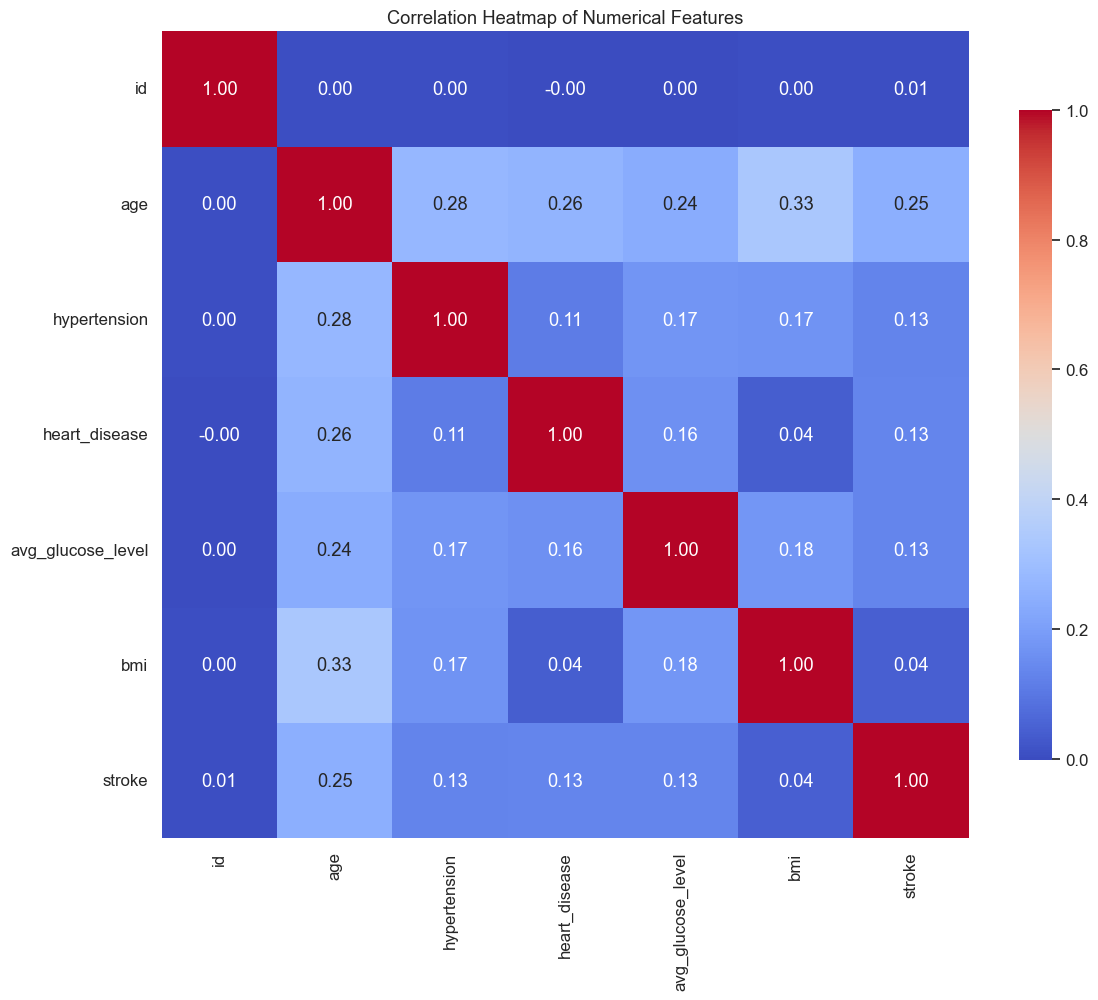

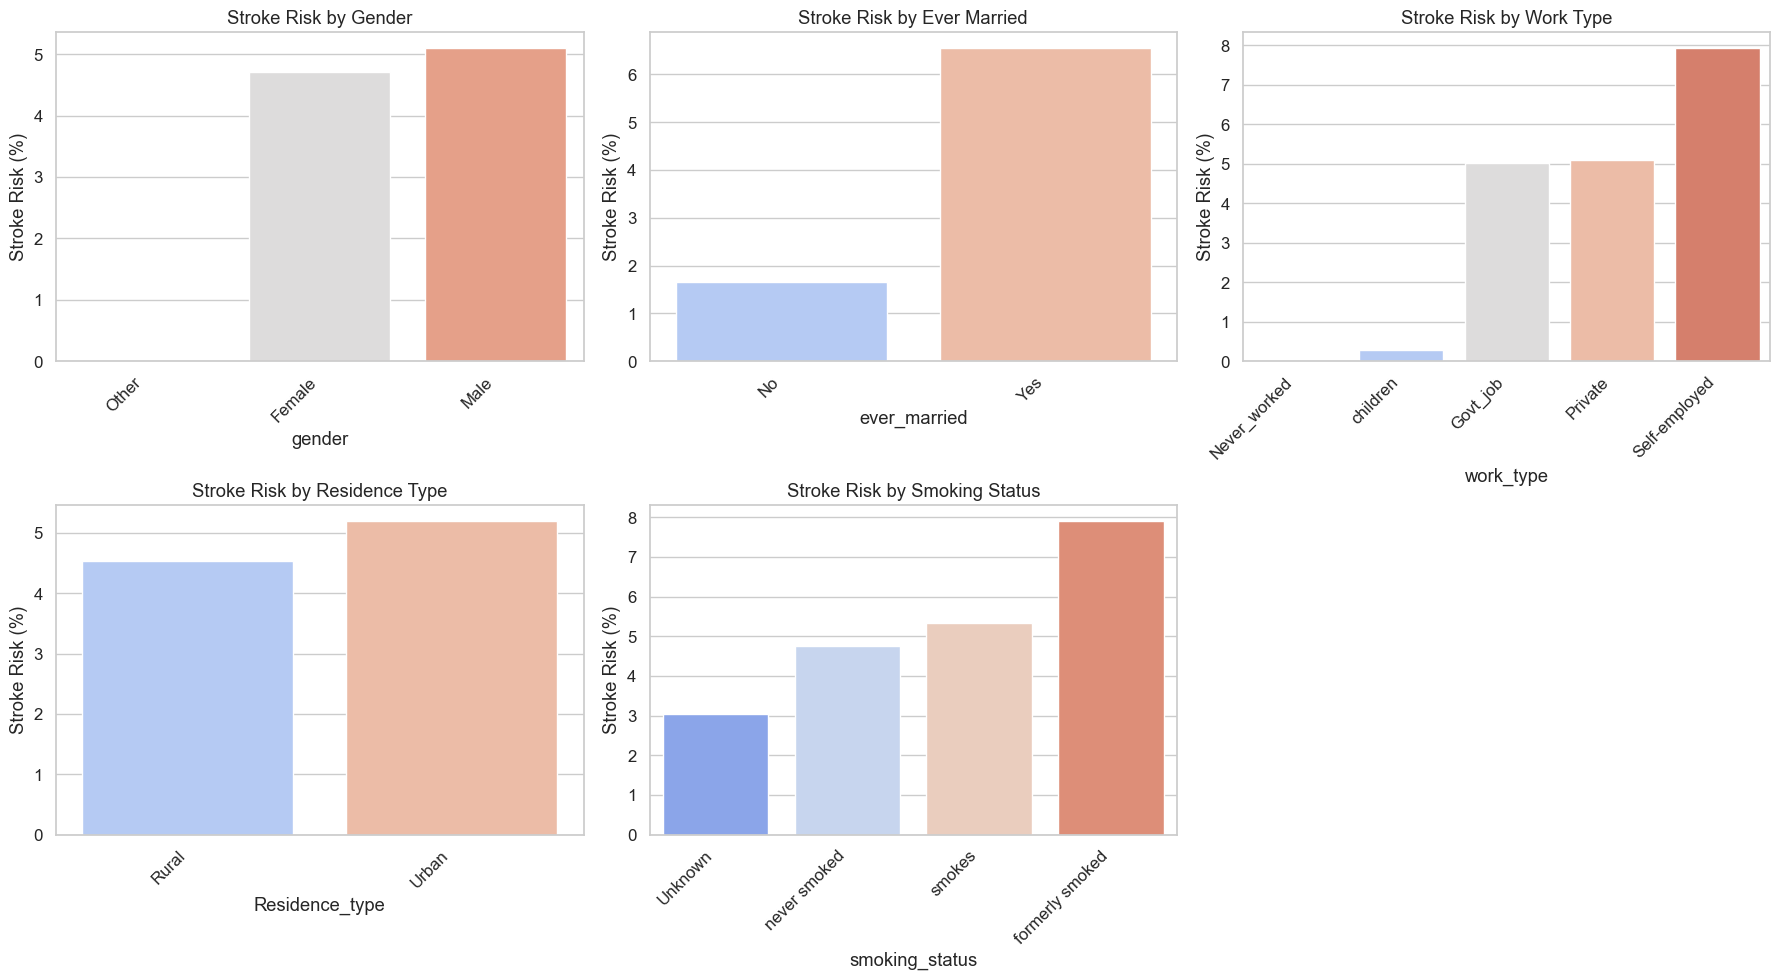


✅ Descriptive statistics saved to '../reports/descriptive_statistics.csv'


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting aesthetics
sns.set(style='whitegrid', palette='pastel', font_scale=1.1)
plt.rcParams['figure.figsize'] = (12, 8)

# Load dataset
df = pd.read_csv("../data/raw/healthcare-dataset-stroke-data.csv")

def dataset_overview():
    """Display basic info and missing value stats of the dataset."""
    print("\n📊 Dataset Overview")
    print("-" * 60)
    print(f"🧾 Total Rows: {df.shape[0]}")
    print(f"🧾 Total Columns: {df.shape[1]}")
    
    print("\n🔍 Column Info:")
    print(df.info())
    
    print("\n❗ Missing Values Summary:")
    print("-" * 60)
    missing = df.isnull().sum()
    missing_pct = df.isnull().mean() * 100
    missing_df = pd.concat([missing, missing_pct], axis=1, keys=["Missing Count", "Percentage"])
    print(missing_df[missing_df["Missing Count"] > 0])

def target_distribution():
    """Visualize class distribution of the target variable 'stroke'."""
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))

    sns.countplot(data=df, x='stroke', ax=axs[0], palette='Set2')
    axs[0].set_title('Stroke Target Distribution')
    axs[0].set_xlabel('Stroke (0 = No, 1 = Yes)')
    axs[0].set_ylabel('Count')

    stroke_counts = df['stroke'].value_counts()
    axs[1].pie(stroke_counts, labels=['No Stroke', 'Stroke'], autopct='%1.1f%%',
               colors=['skyblue', 'salmon'], startangle=90)
    axs[1].set_title('Stroke Occurrence Percentage')

    plt.tight_layout()
    plt.show()

def categorical_feature_analysis():
    """Visualize the distribution of each categorical feature."""
    categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
    n = len(categorical_cols)

    plt.figure(figsize=(18, 10))
    for i, col in enumerate(categorical_cols, 1):
        plt.subplot(2, 3, i)
        sns.countplot(data=df, x=col, palette='muted')
        plt.title(f'{col.replace("_", " ").title()}')
        plt.xticks(rotation=45, ha='right')

    plt.tight_layout()
    plt.show()

def numerical_feature_distribution():
    """Plot distributions of key numerical features by stroke status."""
    num_cols = ['age', 'avg_glucose_level', 'bmi']
    
    plt.figure(figsize=(18, 6))
    for i, col in enumerate(num_cols, 1):
        plt.subplot(1, 3, i)
        sns.histplot(data=df, x=col, hue='stroke', kde=True, multiple='stack', palette='Set2')
        plt.title(f'{col.replace("_", " ").title()} Distribution')
        plt.xlabel(col.replace("_", " ").title())

    plt.tight_layout()
    plt.show()

def correlation_analysis():
    """Plot correlation heatmap of numerical features."""
    numeric_df = df.select_dtypes(include=np.number)
    corr = numeric_df.corr()

    plt.figure(figsize=(12, 10))
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
    plt.title('Correlation Heatmap of Numerical Features')
    plt.tight_layout()
    plt.show()

def stroke_risk_by_categories():
    """Plot stroke risk (percentage) by categorical feature categories."""
    cat_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
    
    plt.figure(figsize=(18, 10))
    for i, col in enumerate(cat_cols, 1):
        plt.subplot(2, 3, i)
        risk = df.groupby(col)['stroke'].mean().sort_values() * 100
        sns.barplot(x=risk.index, y=risk.values, palette='coolwarm')
        plt.title(f'Stroke Risk by {col.replace("_", " ").title()}')
        plt.ylabel('Stroke Risk (%)')
        plt.xticks(rotation=45, ha='right')

    plt.tight_layout()
    plt.show()

def run_all_eda():
    """Run all EDA visualizations and analyses."""
    dataset_overview()
    target_distribution()
    categorical_feature_analysis()
    numerical_feature_distribution()
    correlation_analysis()
    stroke_risk_by_categories()
    
    # Save statistical summary
    df.describe(include='all').to_csv('../reports/descriptive_statistics.csv')
    print("\n✅ Descriptive statistics saved to '../reports/descriptive_statistics.csv'")

# Run EDA
run_all_eda()


In [21]:
# 📦 Analysis After Oversampling

import os
import pandas as pd

BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), '..'))

X_TRAIN_PATH = os.path.join(BASE_DIR, 'data', 'processed', 'X_train_resampled.csv')
Y_TRAIN_PATH = os.path.join(BASE_DIR, 'data', 'processed', 'y_train_resampled.csv')

# Load the datasets
try:
    X_train_resampled = pd.read_csv(X_TRAIN_PATH)
    y_train_resampled = pd.read_csv(Y_TRAIN_PATH)

    print("✅ Resampled training data loaded successfully.")
    print(f"Features shape: {X_train_resampled.shape}")
    print(f"Target shape: {y_train_resampled.shape}")
except FileNotFoundError as e:
    print(f"❌ File not found: {e.filename}")
except Exception as e:
    print(f"⚠️ Error loading files: {e}")


✅ Resampled training data loaded successfully.
Features shape: (6806, 25)
Target shape: (6806, 1)


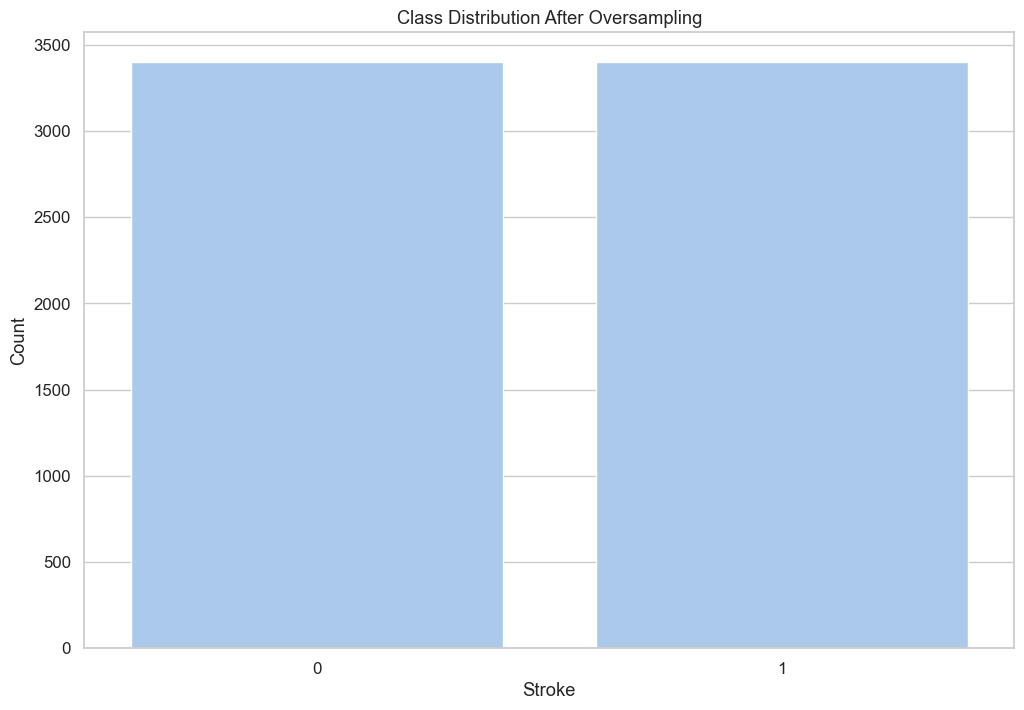

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=y_train_resampled.squeeze())
plt.title('Class Distribution After Oversampling')
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.show()


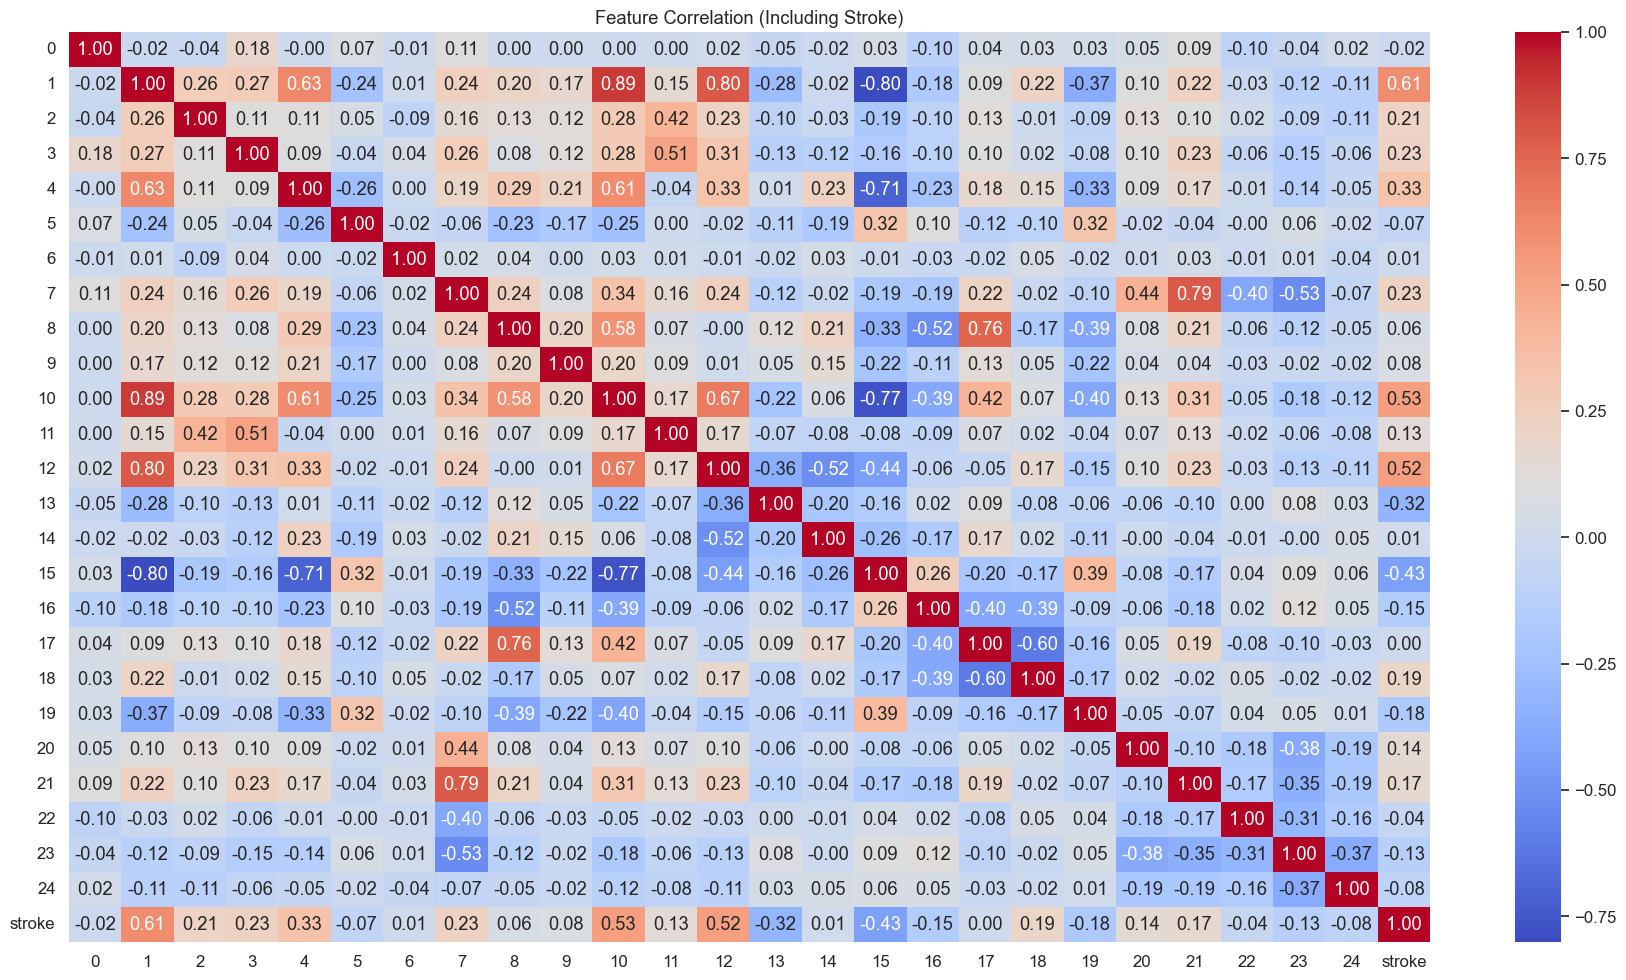

In [28]:
X_train_resampled['stroke'] = y_train_resampled
correlation = X_train_resampled.corr()

plt.figure(figsize=(18, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation (Including Stroke)')
plt.tight_layout()
plt.show()


In [29]:
print(X_train_resampled.describe())


                 0            1            2            3            4  \
count  6806.000000  6806.000000  6806.000000  6806.000000  6806.000000   
mean     -0.016266     0.529361     0.245455     0.293803     0.257450   
std       0.967609     0.966053     1.268888     1.440163     0.852847   
min      -0.841556    -1.919545    -0.326194    -0.238816    -1.393417   
25%      -0.841556    -0.011135    -0.326194    -0.238816     0.717660   
50%      -0.841556     0.744758    -0.326194    -0.238816     0.717660   
75%       1.185545     1.329711    -0.326194    -0.238816     0.717660   
max       3.212646     1.722974     3.065657     4.187324     0.717660   

                 5            6            7            8            9  ...  \
count  6806.000000  6806.000000  6806.000000  6806.000000  6806.000000  ...   
mean     -0.057660     0.003549     0.248129     0.040543     0.065451  ...   
std       0.887283     0.972016     1.194359     0.823315     0.927215  ...   
min      -2.00634